<a href="https://colab.research.google.com/github/vishal26scalerite/Mydatascienceprojects/blob/main/Delhivery_Case_Study_Vishal_Sharma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case Study- Delhivery

Our Aim is to analyze and clean the given dataset and share insights. We will also add new features and modify the existing ones if required. We'll also do some Hypothesis Testing and Standardize the data if required.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181')

In [ ]:
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

### Dropping NaNs

In [ ]:
df.dropna(how = 'any', inplace = True)

### Converting Date Columns to Date type

In [ ]:
date_columns = ['trip_creation_time', 'od_start_time', 'od_end_time']

In [ ]:
for i in date_columns:
  df[i] = pd.to_datetime(df[i])

### Grouping the Data - Segment Wise

In [ ]:
segments = df.groupby(by = ['trip_uuid', 'source_center', 'destination_center'])

In [ ]:
segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']
for col in segment_cols:
    df[col + '_sum'] = segments[col].cumsum()
df[[col + '_sum' for col in segment_cols]]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144862,92.0,65.3487,94.0
144863,118.0,82.7212,115.0
144864,138.0,103.4265,149.0
144865,155.0,122.3150,176.0


In [ ]:
create_segment_dict = {

    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_type' : 'first',
    'source_name' : 'first',

    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',

    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',

}

In [ ]:
segment_data = segments.agg(create_segment_dict).reset_index()
segment_data.head(10)

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
5,trip-153671043369099517,IND562132AAA,IND000000ACB,training,2018-09-12 00:00:33.691250,FTL,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,2227.5270,1710.0
6,trip-153671046011330457,IND400072AAB,IND401104AAA,training,2018-09-12 00:01:00.113710,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
7,trip-153671052974046625,IND583101AAA,IND583201AAA,training,2018-09-12 00:02:09.740725,FTL,Bellary_Dc (Karnataka),Hospet (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,152.0,59.530350,147.0,46.0,63.6461,147.0,63.6461,45.0
8,trip-153671052974046625,IND583119AAA,IND583101AAA,training,2018-09-12 00:02:09.740725,FTL,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-09-12 03:54:43.114421,2018-09-12 12:00:30.683231,485.0,41.317614,131.0,44.0,53.5761,130.0,53.5761,44.0
9,trip-153671052974046625,IND583201AAA,IND583119AAA,training,2018-09-12 00:02:09.740725,FTL,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-09-12 02:34:10.515593,2018-09-12 03:54:43.114421,80.0,26.600536,63.0,27.0,29.5696,63.0,29.5697,26.0


In [ ]:
segment_data = segment_data.sort_values(by=['od_end_time'], ascending=True).reset_index()

In [ ]:
segment_data['od_time_diff_hour'] = (segment_data['od_end_time'] - segment_data['od_start_time']).dt.total_seconds() /(60)
segment_data['od_time_diff_hour']

0          38.500508
1          49.333390
2          68.588279
3          67.043163
4          52.581701
            ...     
26217    3220.926919
26218    4207.224100
26219    4440.938567
26220    1223.352949
26221    7898.551955
Name: od_time_diff_hour, Length: 26222, dtype: float64

### Trip-wise Data

In [ ]:
trips = segment_data.groupby('trip_uuid')

In [ ]:
create_trip_dict = {

    'data' : 'first',
    'trip_creation_time' : 'first',

    'route_type' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',

}

In [ ]:
trips_data = trips.agg(create_trip_dict).reset_index()
trips_data.head()

,trip_uuid,data,trip_creation_time,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0


In [ ]:
trips_data['destination_name'] = trips_data['destination_name'].str.lower() # lowering all columns
trips_data['source_name'] = trips_data['source_name'].str.lower()

### Building New Features from Source, Destination and Trip_Creation_Time

In [ ]:
trips_data.source_name.value_counts()

gurgaon_bilaspur_hb (haryana)            937
bhiwandi_mankoli_hb (maharashtra)        811
bangalore_nelmngla_h (karnataka)         731
bengaluru_bomsndra_hb (karnataka)        426
chandigarh_mehmdpur_h (punjab)           370
                                        ... 
jaipur_ngrnigam_dc (rajasthan)             1
saundatti_shanthis_d (karnataka)           1
sindagi_kalyanng_d (karnataka)             1
bulndshahr_ymunpurm_d (uttar pradesh)      1
phulera_narenard_d (rajasthan)             1
Name: source_name, Length: 865, dtype: int64

In [ ]:
trips_data.destination_name.value_counts()

gurgaon_bilaspur_hb (haryana)        813
bangalore_nelmngla_h (karnataka)     628
bhiwandi_mankoli_hb (maharashtra)    573
chandigarh_mehmdpur_h (punjab)       431
hyderabad_shamshbd_h (telangana)     400
                                    ... 
bolpur_webeldpp_d (west bengal)        1
bhandara_karemdpp_d (maharashtra)      1
shirdi_saibansi_d (maharashtra)        1
sullia_srirampt_d (karnataka)          1
jaipur_central_d_1 (rajasthan)         1
Name: destination_name, Length: 951, dtype: int64

In [ ]:
def place2state(x):
    # transform "gurgaon_bilaspur_hb (haryana)" into "haryana"
    state = x.split('(')[1]

    return state[:-1] #removing ')' from ending

def place2city(x):
    #we will remove state
    city = x.split(' (')[0]

    city = city.split('_')[0]

    return city

def place2code(x):
    # we will remove state
    x = x.split('(')[0]

    if len(x.split('_')) >= 3:
        return x.split('_')[-1]

    return 'none'


In [ ]:
trips_data['source_state'] = trips_data.source_name.apply(lambda x: place2state(x))
trips_data['source_city'] = trips_data.source_name.apply(lambda x: place2city(x))
trips_data['source_code'] = trips_data.source_name.apply(lambda x: place2code(x))

In [ ]:
trips_data['destination_state'] = trips_data.source_name.apply(lambda x: place2state(x))
trips_data['destination_city'] = trips_data.source_name.apply(lambda x: place2city(x))
trips_data['destination_code'] = trips_data.source_name.apply(lambda x: place2code(x))

In [ ]:
trips_data['trip_year'] = trips_data['trip_creation_time'].dt.year
trips_data['trip_month'] = trips_data['trip_creation_time'].dt.month_name()
trips_data['trip_day'] = trips_data['trip_creation_time'].dt.day_name()


In [ ]:
trips_data[['od_time_diff_hour', 'start_scan_to_end_scan']]

,od_time_diff_hour,start_scan_to_end_scan
0,2260.109800,2259.0
1,181.611874,180.0
2,3934.362520,3933.0
3,100.494935,100.0
4,718.349042,717.0
...,...,...
14782,258.028928,257.0
14783,60.590521,60.0
14784,422.119867,421.0
14785,348.512862,347.0


### Hypothesis Testing

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
null_hypothesis= "There is no significance difference between the Columns' Mean"
alternative = "There is a significance difference"
tstat, pval = ttest_ind(trips_data.od_time_diff_hour, trips_data.start_scan_to_end_scan, alternative= 'two-sided')
alpha = 0.05 #Level of significance is 5%
print(round(pval,2))
if pval >= alpha:
  print(f'Failed to reject null_hypothesis: {null_hypothesis}')
else:
  print(f'Null Hypothesis rejected: {alternative}')

0.91
Failed to reject null_hypothesis: There is no significance difference between the Columns' Mean


In [ ]:
tstat, pval= ttest_ind(trips_data.actual_time, trips_data.osrm_time, alternative= 'two-sided')
alpha = 0.05 #Level of significance is 5%
print(round(pval,2))
if pval >= alpha:
  print(f'Failed to reject null_hypothesis: {null_hypothesis}')
else:
  print(f'Null Hypothesis rejected: {alternative}')

0.0
Null Hypothesis rejected: There is a significance difference


In [ ]:
tstat, pval= ttest_ind(trips_data.actual_time, trips_data.segment_actual_time_sum, alternative= 'two-sided')
alpha = 0.05 #Level of significance is 5%
print(round(pval,2))
if pval >= alpha:
  print(f'Failed to reject null_hypothesis: {null_hypothesis}')
else:
  print(f'Null Hypothesis rejected: {alternative}')

0.62
Failed to reject null_hypothesis: There is no significance difference between the Columns' Mean


In [ ]:
tstat, pval= ttest_ind(trips_data.osrm_distance, trips_data.segment_osrm_distance_sum, alternative= 'two-sided')
alpha = 0.05 #Level of significance is 5%
print(round(pval,2))
if pval >= alpha:
  print(f'Failed to reject null_hypothesis: {null_hypothesis}')
else:
  print(f'Null Hypothesis rejected: {alternative}')

0.0
Null Hypothesis rejected: There is a significance difference


In [ ]:
tstat, pval= ttest_ind(trips_data.osrm_time, trips_data.segment_osrm_time_sum, alternative= 'two-sided')
alpha = 0.05 #Level of significance is 5%
print(round(pval,2))
if pval >= alpha:
  print(f'Failed to reject null_hypothesis: {null_hypothesis}')
else:
  print(f'Null Hypothesis rejected: {alternative}')

0.0
Null Hypothesis rejected: There is a significance difference


### Finding Outliers

In [ ]:
num_cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
            'osrm_distance','segment_actual_time_sum','segment_osrm_distance_sum',
           'segment_osrm_time_sum', 'od_time_diff_hour']

<Axes: >

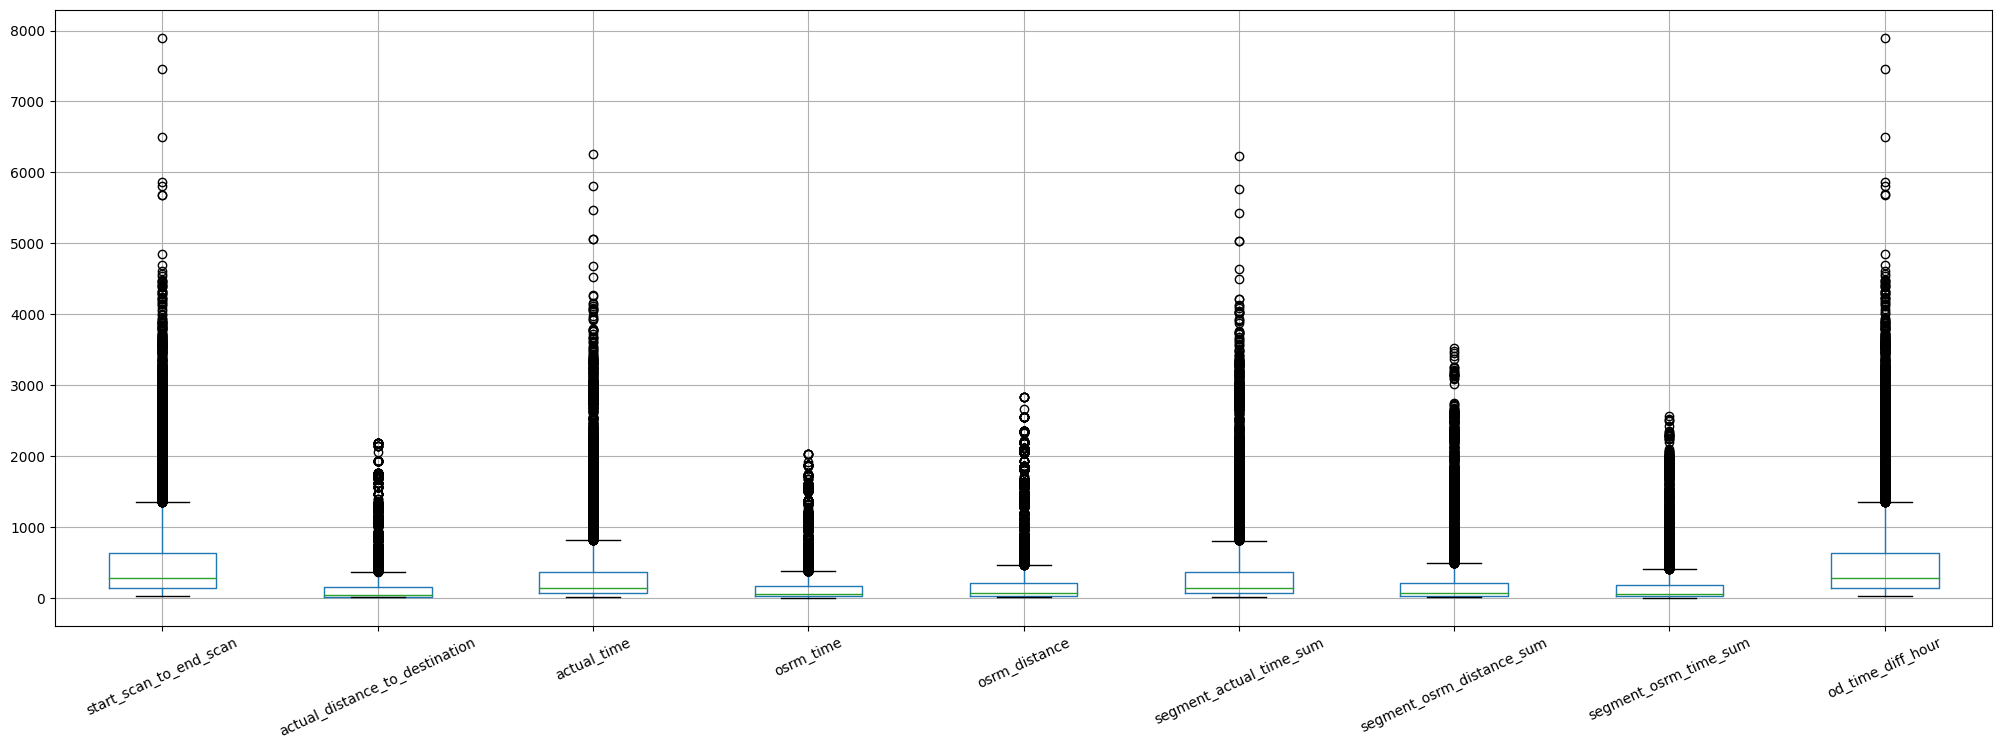

In [ ]:
trips_data[num_cols].boxplot(rot=25, figsize=(25,8))

In [ ]:
# Function to identify outliers based on IQR for each column
def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

In [ ]:
trips_without_outliers= trips_data[-(trips_data[num_cols].apply(identify_outliers).any(axis=1))]

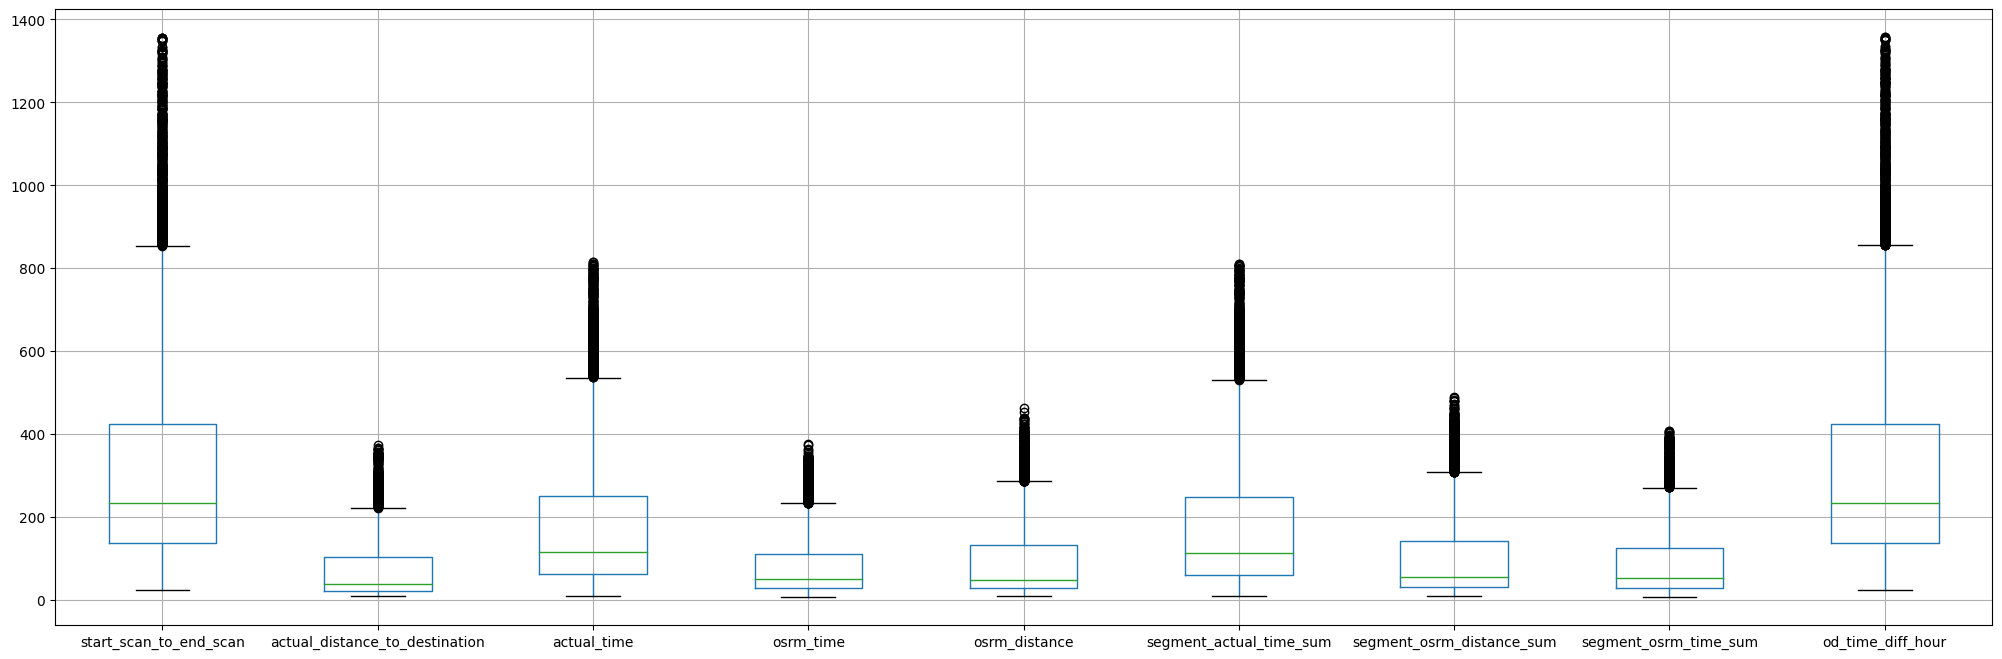

In [ ]:
trips_without_outliers[num_cols].boxplot(figsize = (25,8));

### One Hot Encoding

In [ ]:
trips_without_outliers['route_type'].value_counts()

Carting    8812
FTL        3911
Name: route_type, dtype: int64

In [ ]:
encoding= pd.get_dummies(trips_without_outliers.route_type)
trips_without_outliers= pd.concat([trips_without_outliers, encoding], axis = 1)

In [ ]:
trips_without_outliers.drop('route_type', axis = 1, inplace = True)

### Column Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(trips_without_outliers[num_cols])

StandardScaler()

In [ ]:
trips_without_outliers[num_cols] = scaler.transform(trips_without_outliers[num_cols])

In [ ]:
trips_without_outliers[num_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
1,-0.548546,0.012060,-0.217856,-0.144341,-0.073948,-0.221500,-0.145358,-0.262662,-0.544839
3,-0.861602,-0.765152,-0.749015,-0.877085,-0.804506,-0.743482,-0.823653,-0.878225,-0.861856
4,1.552838,0.764988,1.034163,0.533102,0.614738,1.045260,0.514899,0.365464,1.552812
5,-0.513328,-0.662169,-0.736369,-0.766482,-0.710888,-0.737116,-0.737295,-0.790288,-0.510150
6,-0.869428,-0.877197,-0.970332,-0.904736,-0.890050,-0.966279,-0.906532,-0.915913,-0.871585
...,...,...,...,...,...,...,...,...,...
14782,-0.247231,-0.201970,-0.597255,-0.227293,-0.204002,-0.597073,-0.349273,-0.300349,-0.246189
14783,-1.018130,-0.788207,-0.989302,-0.918561,-0.844610,-0.985376,-0.863608,-0.941038,-1.017809
14784,0.394533,-0.466688,0.661086,-0.420848,-0.366561,0.669688,0.072932,0.026276,0.395103
14785,0.104957,0.865940,0.547267,1.390274,0.886261,0.523279,1.324267,1.697092,0.107436


### Recommendations

Upon doing the Hypothesis Testing, we found that there is a significant difference between OSRM and actual parameters. So, the company must have a check on routes as well as the OSRM.

More research could be done to identify potential routes in other parts of country which can reduce the time of the delivery and help the company expand.